# <a id='0'>Content</a>

- <a href='#1'>Introduction</a>  
- <a href='#2'>Importing Libraries</a>  
- <a href='#3'>Read the data</a>  
- <a href='#4'>Check the data</a>  
- <a href='#5'>Data exploration</a>
- <a href='#6'>Predictive model</a>  
    - <a href='#61'>Split the data</a> 
    - <a href='#62'>Training data</a>   
    - <a href='#63'>Model evaluation</a>  
    - <a href='#64'>Prediction</a>     
- <a href='#8'>References</a>


# <a id="7">Importing libraries<a/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from scipy import stats
plt.style.use("seaborn")

import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode , iplot , plot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()

# import statsmodels.formula.api as smf
from sklearn import (metrics, linear_model, preprocessing)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
# from functions import *  # this is for my functions notebook
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

from sklearn.ensemble import RandomForestClassifier
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV ,StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report , accuracy_score , roc_auc_score


import warnings
warnings.simplefilter(action = "ignore" , category = FutureWarning)

# <a id='7'>This gives you the location of your directory since i dont want to be dealing with any merge conflicts today.<a/>

In [2]:
import os
print ('default',os.getcwd())

default /Users/flatironschool/Desktop/iNueron/colabs/Hackathon-Ineuron/Josh_notebooks


# <a id = '7'>Conecting to the path of the dataframe<a/>

In [3]:
pd.set_option('display.max_rows', 200)

pd.options.mode.chained_assignment = None

path = 'Data/cardio_train.csv'  # note i kept the csv file in dataset file so its easy to call from there
df=pd.read_csv(path, na_values='NA')
df

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,988;22469;1;155;69.0;130;80;2;2;0;0;1;0
1,989;14648;1;163;71.0;110;70;1;1;0;0;1;1
2,990;21901;1;165;70.0;120;80;1;1;0;0;1;0
3,991;14549;2;165;85.0;120;80;1;1;1;1;1;0
4,992;23393;1;155;62.0;120;80;1;1;0;0;1;0
...,...
69296,99993;19240;2;168;76.0;120;80;1;1;1;0;1;0
69297,99995;22601;1;158;126.0;140;90;2;2;0;0;1;1
69298,99996;19066;2;183;105.0;180;90;3;1;0;1;0;1
69299,99998;22431;1;163;72.0;135;80;1;2;0;0;0;1


# <a id ='7'>Data looks messy and a simple trick will put it in order<a/>

In [5]:
df = pd.read_csv(path , na_values = 'NA' , sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [11]:
print('Cardio Data - rows:' , df.shape[0],'columns:', df.shape[1])

Cardio Data - rows: 69301 columns: 13


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           69301 non-null  int64  
 1   Age          69301 non-null  int64  
 2   Gender       69301 non-null  int64  
 3   Height       69301 non-null  int64  
 4   Weight       69301 non-null  float64
 5   Ap_hi        69301 non-null  int64  
 6   Ap_lo        69301 non-null  int64  
 7   Cholesterol  69301 non-null  int64  
 8   Gluc         69301 non-null  int64  
 9   Smoke        69301 non-null  int64  
 10  Alco         69301 non-null  int64  
 11  Active       69301 non-null  int64  
 12  Cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# <a id = '7'>Checking for % of missing values . Observation , the data has no missing values.<a/>


In [12]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,cardio,active,alco,smoke,gluc,cholesterol,ap_lo,ap_hi,weight,height,gender,age,id
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
print("There are {} missing values in data frame".format(df.isnull().sum().sum()))

There are 0 missing values in data frame


# <a id='7'>Checking for duplicates<a/>

In [9]:
df.duplicated().sum()

0

# <a id='7'>Observation : There are no duplicate columns.<a/>


In [48]:
print("There are {} duplicated values in data frame".format(df.duplicated().sum()))

There are 0 duplicated values in data frame


In [52]:
# Checking for the statistical analysis of the data. This way we know more about what we are dealing with
df.describe()

,Id,Age,Gender,Height,Weight,Ap_hi,Ap_lo,Cholesterol,Gluc,Smoke,Alco,Active,Cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Note : to be able to give an indepth analysis requires a bit of research or industry knowlegde.
# hence age column is clearly not up to standard , Min height is wierd and a wait of 10 doesnt make sense for adults.
# thus we need to pay a little visit later to these columns.

# <a id ='7'>Checking the columns of the dataframe. Nothing alarming here.<a/> 

In [10]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

# <a id='7'>Cleaning Column Names<a/>

In [13]:
new = [col.capitalize() for col in df.columns]
df.columns = new

In [14]:
# Checking results
df.columns

Index(['Id', 'Age', 'Gender', 'Height', 'Weight', 'Ap_hi', 'Ap_lo',
       'Cholesterol', 'Gluc', 'Smoke', 'Alco', 'Active', 'Cardio'],
      dtype='object')

# <a id = '7'>Check categorical columns<a/> 

In [16]:
cat_cols = list(set(df.columns) - set(df._get_numeric_data().columns))
cat_cols

[]

# <a id='7'>Check numerical columns<a/>

In [17]:
num_cols = list(df._get_numeric_data().columns)
num_cols

['Id',
 'Age',
 'Gender',
 'Height',
 'Weight',
 'Ap_hi',
 'Ap_lo',
 'Cholesterol',
 'Gluc',
 'Smoke',
 'Alco',
 'Active',
 'Cardio']

# <a id='7'>Creating Heatmap<a/>

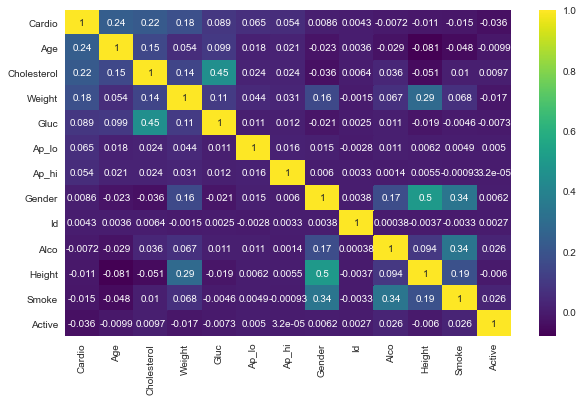

In [23]:
k = 15
target = 'Cardio'
cols = df[num_cols].corr().nlargest(k , target)[target].index
cm = df[cols].corr()
plt.figure(figsize = (10, 6))
sns.heatmap(cm , annot = True , cmap = 'viridis')
plt.show()

In [15]:
# make a copy of the dataframe for later manipulation
df1 = df[:]

# <a id='7'>Feature density plot<a/>

<Figure size 576x396 with 0 Axes>

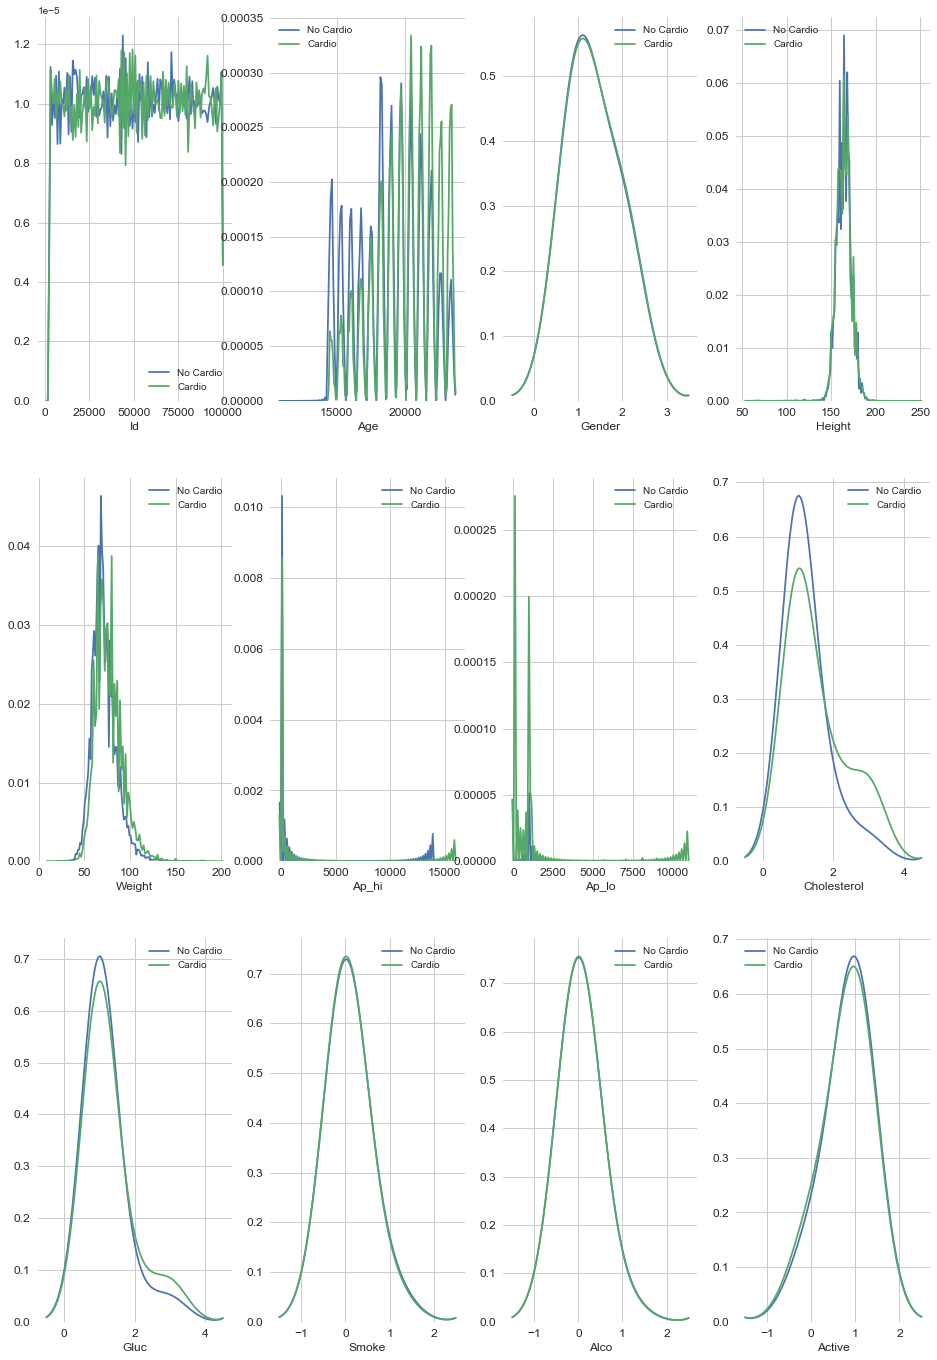

In [41]:
features = [f for f in df1.columns if f not in ['Cardio']]
target = 'Cardio'

i = 0
t0 = df1[df1['Cardio'] == 0]
t1 = df1[df1['Cardio'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(3,4,figsize=(16,24))

for feature in features:
    i += 1
    plt.subplot(3,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="No Cardio")
    sns.kdeplot(t1[feature], bw=0.5,label="Cardio")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

# <a id='7'>Distibution of Target variable<a/>

In [32]:
df['Cardio'].value_counts()

0    34679
1    34622
Name: Cardio, dtype: int64

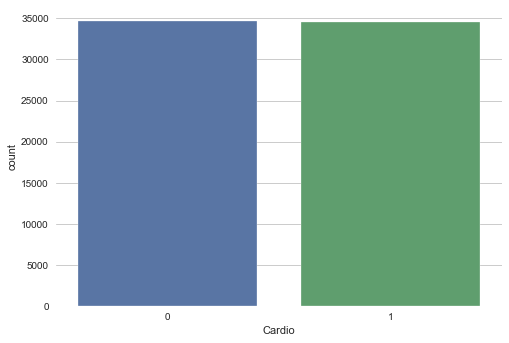

In [35]:
# df['Cardio'].value_counts().plot(kind='bar')
sns.countplot(df['Cardio'],label="Count")
plt.show()

In [ ]:
# Observation : Target column seems to be very balanced

In [36]:
# Making a copy of the dataframe
df2 = df.copy()

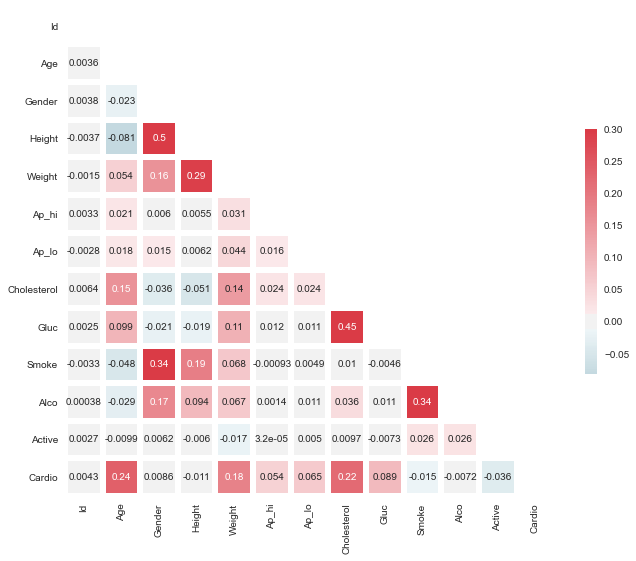

In [74]:
corr = df.corr()
cmap = sns.diverging_palette(220,10, as_cmap=True)
"""Generate a mask for the upper triangle"""
mask = np.zeros_like(corr , dtype=np.bool)
mask[np.triu_indices_from(mask)]=True 
"""Set up the matplotlib figure"""
f , ax = plt.subplots(figsize=(11,9))
"""Draw the heatmap with the mask and correct aspect ratio"""
sns.heatmap(corr , mask = mask , cmap=cmap , vmax=.3, center=0 , annot=True,
           square = True , linewidths=5 , cbar_kws={'shrink':.5});

In [ ]:
# Observations:
As we can see age and cholesterol have significant impact, but not very high correlated with target class

In [ ]:
# Lets take a look at the age columns

In [77]:
# What is the mean age
df['Age'].mean().round(2)

19468.79

# <a id>Function to Find highly correlated variables and remove Multicollinearity<a/>

In [ ]:
# By Checking the heatmap it could be seen that some areas are showing quite high interactions and this could lead to 
# Multicollinearity. The threshold is usually 0.65. Anything above that needs to be removed to prevent it from misleading
# our model. 

In [60]:
## Correlation between Features
corr_data = df1.corr()['Cardio'].sort_values(ascending = False)
print(corr_data.tail)

<bound method NDFrame.tail of Cardio         1.000000
Age            0.238095
Cholesterol    0.220752
Weight         0.182094
Gluc           0.089062
Ap_lo          0.065290
Ap_hi          0.054211
Gender         0.008592
Id             0.004269
Alco          -0.007217
Height        -0.011015
Smoke         -0.015225
Active        -0.035592
Name: Cardio, dtype: float64>


In [61]:
# Remove Multicollinear features
def remove_collinear(x , threshold):
    
    y = x['Cardio']
    x = x.drop(columns = ['Cardio'])
    
    #calc the correlation matrix
    corr_matrix = x.corr()
    elements = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    
    # Iterate through cor matrix and compare correlations
    for s in elements:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1) , (s+1):(s+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # if corr exceeds threshold
            if val >= threshold:
                drop_cols.append(col.values[0])
                
    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    # Add the score back into the data
    x['Cardio'] = y
    
    return x   

In [ ]:
# remove_collinear(x , 0.6)

In [54]:
df.columns

Index(['Id', 'Age', 'Gender', 'Height', 'Weight', 'Ap_hi', 'Ap_lo',
       'Cholesterol', 'Gluc', 'Smoke', 'Alco', 'Active', 'Cardio'],
      dtype='object')

In [53]:
# need to come back to this visualization later
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="Blues",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

In [ ]:
# boxplot_variation('Age','Gender','Height' , 8)

In [ ]:
# boxplot_variation("Age", "Gender" , "Smoke" , 12)

In [ ]:
# boxplot_variation('MARRIAGE','AGE', 'SEX',8)
# boxplot_variation('EDUCATION','AGE', 'SEX',12)
# boxplot_variation('AGE','LIMIT_BAL','SEX' ,16)  